In [1]:
import cv2
from forwardF import wm_au_emb
import numpy as np
from matplotlib import pyplot as plt
from detectF import *
from recoveryF import stage1_recovery,stage2_recovery

In [2]:
key = (13,137,811)

In [3]:
key = (13,137,811)
image = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\A_Data\\png\\airplane.png")
w_image = wm_au_emb(image,key)


In [4]:
mask = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\A_Data_Tamper\\mask_airplane.png",0)
masked = cv2.bitwise_and(w_image, w_image, mask=mask)
mask = cv2.resize(mask,dsize=(512-128,512-128))
masked = cv2.resize(masked,dsize=(512-128,512-128))
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(w_image[0:200,128:512],w_image[0:200,128:512],mask = mask_inv[50:250,:] )
img2_object =  cv2.bitwise_and(masked[50:250,:,:] ,masked[50:250,:,:] ,mask = mask[50:250,:] )
tamp_img = w_image.copy()
tamp_img[0:200,128:512] = cv2.add(img1_bg,img2_object)

In [22]:
mask = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\A_Data_Tamper\\mask_airplane.png",0)
masked = cv2.bitwise_and(w_image, w_image, mask=mask)
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(w_image[301:501,:,:],w_image[301:501,:,:],mask = mask_inv[100:300,:] )
img2_object =  cv2.bitwise_and(masked[100:300,:,:] ,masked[100:300,:,:] ,mask = mask[100:300,:] )
tamp_img = w_image.copy()
tamp_img[301:501,:,:] = cv2.add(img1_bg,img2_object)

In [5]:
print(cv2.PSNR(w_image,image))

46.36129572380262


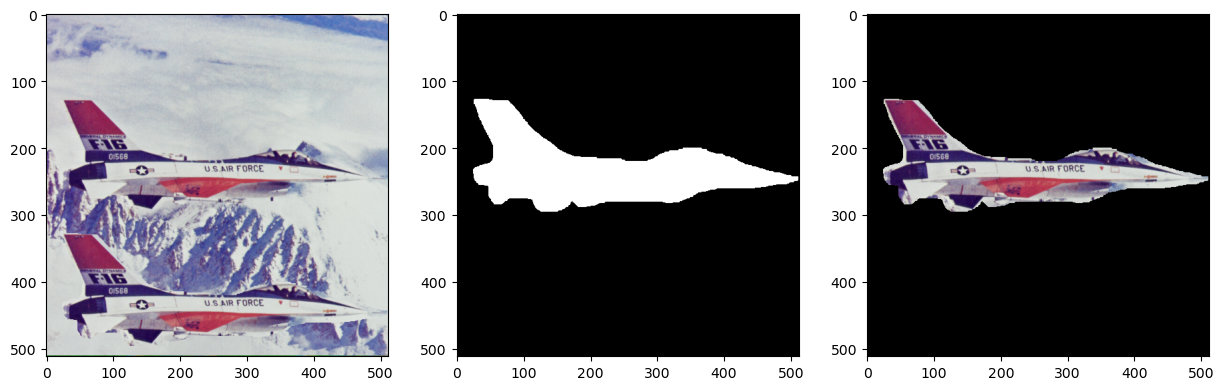

In [23]:
fig,axes =  plt.subplots(1, 3,figsize = (15,5))
axes[0].imshow(cv2.cvtColor(tamp_img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(mask, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [24]:
lv1_matrix = level_one_detection(tamp_img)
lv2_matrix = lv1_matrix.copy()
lv3_matrix = lv1_matrix.copy()
for channel in range(3):
    lv2_matrix[:,:,channel] = level_two_detection(lv1_matrix[:,:,channel])
    lv3_matrix[:,:,channel] = level_three_detection(lv2_matrix[:,:,channel])
lv3_detection = lv3_matrix[:,:,0] & lv3_matrix[:,:,1] & lv3_matrix[:,:,2]
r1_img,lv4_BGR= stage1_recovery(t_img=tamp_img,key=key)
r2_img,lv5_BGR = stage2_recovery(r1_img=r1_img,lv4_matrix=lv4_BGR)

In [27]:
lv3_detection = lv3_matrix[:,:,0] & lv3_matrix[:,:,1] & lv3_matrix[:,:,2]
print(cv2.PSNR(r1_img,w_image))
print(cv2.PSNR(r2_img,w_image))

37.39782480376521
37.39782480376521


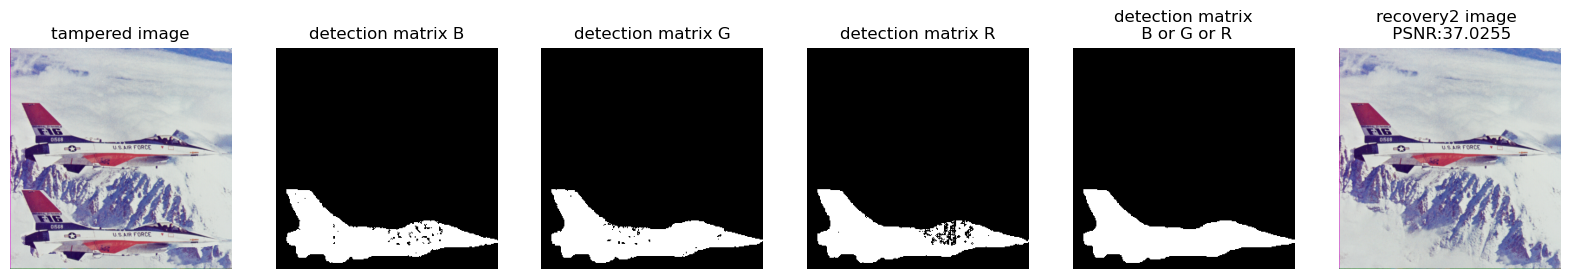

In [26]:
fig, axes = plt.subplots(1, 6,figsize = (20,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()
axes[4].set_axis_off()
axes[5].set_axis_off()

axes[0].set_title(f'tampered image')
axes[1].set_title(f'detection matrix B')
axes[2].set_title(f'detection matrix G')
axes[3].set_title(f'detection matrix R')
axes[4].set_title(f'detection matrix\n B or G or R')
axes[5].set_title(f'recovery2 image \n PSNR:{cv2.PSNR(r2_img,image):.4f}')

axes[0].imshow(cv2.cvtColor(tamp_img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(1-lv3_matrix[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2].imshow(1-lv3_matrix[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(1-lv3_matrix[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[4].imshow(1-lv3_detection, cmap=plt.cm.gray,vmax=1,vmin=0)
axes[5].imshow(cv2.cvtColor(r2_img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)